In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_excel(r'C:\Users\USER\Desktop\Credit risk prediction\datasetv1-1.xlsx')

In [ ]:
data.shape

(355, 30)

In [5]:
data.head()

,age_range,gender,marital_status,region,highest_education,school,graduation,study_programme,employment_status,last_year_benefitted,total_loan,loan_purpose,repayment_status,informed_repayment_obligations,repayment_info_source,repayment_method,repayment_method_convenience,effectiveness_repayment_method,any_loan_repayment_challenges,loan_repayment_challenges,collection_strategy_effectiveness,factors_loan_repayment_performance,repayment_challenges,interaction_quality_on_repayment,suggested_collection_improvements,tech_tools_improving_recovery,any_alternative_collection_strategies,alternative_collection_strategies,overall_experience_with_loan_process,reCoMmendations
0,38 to 48,Male,Married,Southern,Master,Poly,2004.0,Accountancy,Employed_fulltime,2004,"Less than MWK 200,000",Tuition_Living_Stationery,Fully_paid,NaN,CRBreport,oneoff,neutral,ineffective,yes,"repayment_info_gap, lack_communication_HESLGB",effective,"employment_status, repayment_terms_awareness, ...",lacking_clear_comunication_from_HESLGB,neutral,NaN,NaN,NaN,Contact us via emails with CoMplete informatio...,Dissatisfied,"Improve communication and follow-up, Simplify ..."
1,28 to 37,Female,Single,Central,Master,Poly,2014.0,Accountancy,Employed_fulltime,2014,"MWK 300,001 – MWK 500,000",Tuition_Living_Stationery,Fully_paid,NaN,Employer,monthly_salary,convenient,ineffective,no,no_challenges,ineffective,"employment_status, income_levels, economic_con...",lacking_clear_comunication_from_HESLGB,neutral,NaN,NaN,NaN,Tracking system and better communication,Dissatisfied,"Improve communication and follow-up, Simplify ..."
2,28 to 37,Male,Married,Central,Master,Poly,2014.0,Accountancy,Employed_fulltime,2013,"MWK 600,001 – MWK 1,000,000",Tuition_Living,Fully_paid,NaN,Email_Phonecall,monthly_salary,very_convenient,very_effective,yes,"lack_communication_HESLGB, high_interest_rates",very_effective,"employment_status, economic_conditions","lacking_clear_comunication_from_HESLGB, high_c...",very_positive,NaN,NaN,NaN,Offer rewards for timely payments or early set...,Very satisfied,Provide more flexible repayment plans
3,28 to 37,Female,Married,Southern,Master,Poly,2012.0,Accountancy,Employed_fulltime,2011,"MWK 600,001 – MWK 1,000,000",Tuition_Living,Fully_paid,NaN,Phonecall_Inperson,monthly_salary,very_convenient,very_effective,yes,"lack_communication_HESLGB, high_interest_rates",very_effective,"employment_status, family_obligations, repayme...","insufficient_income, high_cost_living",very_positive,NaN,NaN,NaN,Identify and address potential issues before t...,Very satisfied,"Improve communication and follow-up, Reduce in..."
4,28 to 37,Male,Married,Central,Bachelor,Poly,2016.0,Accountancy,Employed_fulltime,2015,"MWK 600,001 – MWK 1,000,000",Tuition_Living_Stationery,Fully_paid,NaN,Phonecall_Inperson,monthly_salary,very_convenient,very_effective,yes,"lack_communication_HESLGB, high_interest_rates",very_effective,"employment_status, family_obligations","unemployment, high_cost_living",very_positive,NaN,NaN,NaN,Identify and address potential issues before t...,Very satisfied,"Improve communication and follow-up, Provide m..."


In [ ]:
for column in data.columns:
    print(column) 

age_range
gender
marital_status
region
highest_education
school
graduation
study_programme
employment_status
last_year_benefitted
total_loan
loan_purpose
repayment_status
informed_repayment_obligations
repayment_info_source
repayment_method
repayment_method_convenience
effectiveness_repayment_method
any_loan_repayment_challenges
loan_repayment_challenges
collection_strategy_effectiveness
factors_loan_repayment_performance
repayment_challenges
interaction_quality_on_repayment
suggested_collection_improvements
tech_tools_improving_recovery
any_alternative_collection_strategies
alternative_collection_strategies
overall_experience_with_loan_process
reCoMmendations


In [11]:
data.dtypes

age_range                                 object
gender                                    object
marital_status                            object
region                                    object
highest_education                         object
school                                    object
graduation                               float64
study_programme                           object
employment_status                         object
last_year_benefitted                       int64
total_loan                                object
loan_purpose                              object
repayment_status                          object
informed_repayment_obligations            object
repayment_info_source                     object
repayment_method                          object
repayment_method_convenience              object
effectiveness_repayment_method            object
any_loan_repayment_challenges             object
loan_repayment_challenges                 object
collection_strategy_

## EDA and Preprocessing

In [14]:
for feature in data.columns:
    print(feature)
    print(data[feature].unique())
    print()

age_range
['38 to 48' '28 to 37' 'Above 49' '21 to 27' nan]

gender
['Male' 'Female']

marital_status
['Married' 'Single' 'Widowed' 'Divorced']

region
['Southern' 'Central' 'northern' nan]

highest_education
['Master' 'Bachelor' 'Doctorate' nan 'Diploma']

school
['Poly' 'Luanar' 'Chanco' 'Mzuni' 'Luanar ' 'Chanco ' 'MANCOSA' 'CoM ' nan
 'CoM' 'MUST' 'KCN']

graduation
[2004. 2014. 2012. 2016. 2000. 2015. 2001. 2013. 2008. 2017. 2003. 2002.
 2011.   nan 2005. 2007. 2010. 2009. 2006. 1990. 1999. 1997. 1992. 1996.
 1993.]

study_programme
['Accountancy' 'Agribusiness_Management' 'Agricultural_Economics'
 'Arts_Humanities' 'Theology_and_Religious_Studies' 'Sociology'
 'Agricultural_Technology' 'Commerce' 'Humanities' 'Sports_Management'
 'Business_Administration' 'Cultural_Studies' 'Media_for_Development'
 'Bachelor_of_Arts_Political_Science' 'Arts_Education' 'Civil_Engineering'
 'Education_Languages' 'Business_Studies' 'Education_Science'
 'Education_Technical' 'Environmental_Management

In [38]:
print('start:')
print(list(data.columns).index('loan_repayment_challenges'))
print('end:')
print(list(data.columns).index('reCoMmendations'))


start:
18
end:
25


In [4]:
drop_cols=['overall_experience_with_loan_process','collection_strategy_effectiveness',
         'interaction_quality_on_repayment'        
        ]
data_2 = data.iloc[:, 18:26]
data_2 = data_2.drop(columns=[col for col in drop_cols if col in data_2.columns])
print(list(data_2.columns))

['any_loan_repayment_challenges', 'loan_repayment_challenges', 'factors_loan_repayment_performance', 'repayment_challenges', 'suggested_collection_improvements', 'tech_tools_improving_recovery']


In [5]:
# separating data_2 from data
drop_cols = list(data_2.columns)
data_1 = data.drop(columns = [column for column in drop_cols if column in data.columns])
print(data_1.shape)

(355, 24)


In [6]:
def dropMissing(data, threshold):
    cols_drop = []
    for feature in data.columns:
        if ((data[feature].isna().sum()) >= threshold):
            cols_drop.append(feature)
            
    return data.drop(columns=cols_drop)

In [7]:
data_1 = dropMissing(data_1, (len(data)/2))
print(data_1.shape)

(355, 22)


In [8]:
def distTable(data):
    for feature in data.columns:
        counts = data[feature].value_counts()
        percentages = (data[feature].value_counts(normalize=True)*100).round(2)
    
        table = pd.DataFrame({
            'Response': counts.index,
            'Frequency': counts.values,
            'Percentage(%)': percentages.values
        })
        print(f'{feature}')
        print(table)
        print()

In [9]:
distTable(data_1)

age_range
   Response  Frequency  Percentage(%)
0  28 to 37        175          49.44
1  38 to 48         66          18.64
2  21 to 27         61          17.23
3  Above 49         52          14.69

gender
  Response  Frequency  Percentage(%)
0     Male        217          61.13
1   Female        138          38.87

marital_status
   Response  Frequency  Percentage(%)
0   Married        196          55.21
1    Single        130          36.62
2  Divorced         15           4.23
3   Widowed         14           3.94

region
   Response  Frequency  Percentage(%)
0   Central        143          40.51
1  Southern        109          30.88
2  northern        101          28.61

highest_education
    Response  Frequency  Percentage(%)
0   Bachelor        231          65.44
1     Master         79          22.38
2  Doctorate         42          11.90
3    Diploma          1           0.28

school
   Response  Frequency  Percentage(%)
0     Mzuni        114          32.20
1    Chanco      

In [10]:
cols_drop = ['alternative_collection_strategies', 'reCoMmendations']
data_1 = data_1.drop(columns=[cols for cols in cols_drop if cols in data_1])

In [11]:
distTable(data_1)

age_range
   Response  Frequency  Percentage(%)
0  28 to 37        175          49.44
1  38 to 48         66          18.64
2  21 to 27         61          17.23
3  Above 49         52          14.69

gender
  Response  Frequency  Percentage(%)
0     Male        217          61.13
1   Female        138          38.87

marital_status
   Response  Frequency  Percentage(%)
0   Married        196          55.21
1    Single        130          36.62
2  Divorced         15           4.23
3   Widowed         14           3.94

region
   Response  Frequency  Percentage(%)
0   Central        143          40.51
1  Southern        109          30.88
2  northern        101          28.61

highest_education
    Response  Frequency  Percentage(%)
0   Bachelor        231          65.44
1     Master         79          22.38
2  Doctorate         42          11.90
3    Diploma          1           0.28

school
   Response  Frequency  Percentage(%)
0     Mzuni        114          32.20
1    Chanco      

In [14]:
def impute_missing_values(df): 
    for column in df.columns:
        missing_count = df[column].isnull().sum()
        if missing_count < 70:
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
    return df

In [15]:
handle = impute_missing_values(data_1)

In [16]:
handle.isnull().sum()

age_range                               0
gender                                  0
marital_status                          0
region                                  0
highest_education                       0
school                                  0
graduation                              0
study_programme                         0
employment_status                       0
last_year_benefitted                    0
total_loan                              0
loan_purpose                            0
repayment_status                        0
repayment_info_source                   0
repayment_method                        0
repayment_method_convenience            0
effectiveness_repayment_method          0
collection_strategy_effectiveness       0
interaction_quality_on_repayment        0
alternative_collection_strategies       0
overall_experience_with_loan_process    0
reCoMmendations                         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

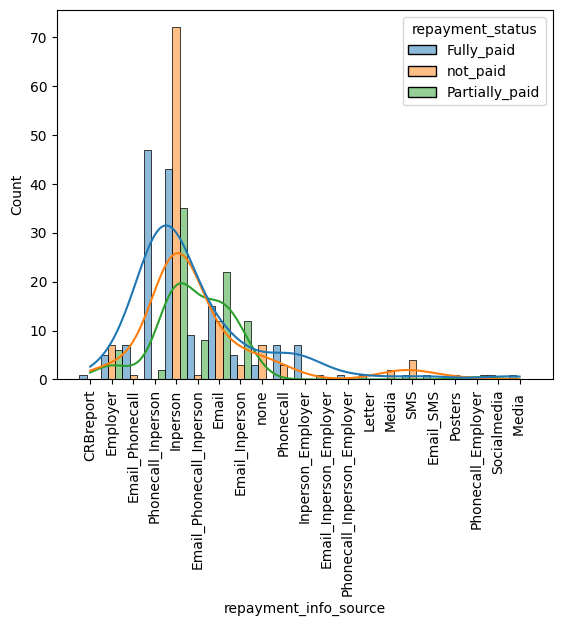

In [10]:
sns.histplot(data=data_1, x=data_1.repayment_info_source, hue='repayment_status',multiple='dodge' ,kde='line', color='black', bins=7)
plt.xticks(rotation=90)
plt.show()


In [28]:
data_1.columns

Index(['age_range', 'gender', 'marital_status', 'region', 'highest_education',
       'school', 'graduation', 'study_programme', 'employment_status',
       'last_year_benefitted', 'total_loan', 'loan_purpose',
       'repayment_status', 'repayment_info_source', 'repayment_method',
       'repayment_method_convenience', 'effectiveness_repayment_method',
       'collection_strategy_effectiveness', 'interaction_quality_on_repayment',
       'overall_experience_with_loan_process'],
      dtype='object')

In [13]:
data_1.to_csv(r"C:\Users\USER\Desktop\Credit risk prediction\data-1.csv",index=False)

In [25]:
data_1.repayment_status.unique()

array(['Fully_paid', 'not_paid', 'Partially_paid'], dtype=object)

In [22]:
data_1.head()

,age_range,gender,marital_status,region,highest_education,school,graduation,study_programme,employment_status,last_year_benefitted,total_loan,loan_purpose,repayment_status,repayment_info_source,repayment_method,repayment_method_convenience,effectiveness_repayment_method,collection_strategy_effectiveness,interaction_quality_on_repayment,overall_experience_with_loan_process
0,38 to 48,Male,Married,Southern,Master,Poly,2004.0,Accountancy,Employed_fulltime,2004,"Less than MWK 200,000",Tuition_Living_Stationery,Fully_paid,CRBreport,oneoff,neutral,ineffective,effective,neutral,Dissatisfied
1,28 to 37,Female,Single,Central,Master,Poly,2014.0,Accountancy,Employed_fulltime,2014,"MWK 300,001 – MWK 500,000",Tuition_Living_Stationery,Fully_paid,Employer,monthly_salary,convenient,ineffective,ineffective,neutral,Dissatisfied
2,28 to 37,Male,Married,Central,Master,Poly,2014.0,Accountancy,Employed_fulltime,2013,"MWK 600,001 – MWK 1,000,000",Tuition_Living,Fully_paid,Email_Phonecall,monthly_salary,very_convenient,very_effective,very_effective,very_positive,Very satisfied
3,28 to 37,Female,Married,Southern,Master,Poly,2012.0,Accountancy,Employed_fulltime,2011,"MWK 600,001 – MWK 1,000,000",Tuition_Living,Fully_paid,Phonecall_Inperson,monthly_salary,very_convenient,very_effective,very_effective,very_positive,Very satisfied
4,28 to 37,Male,Married,Central,Bachelor,Poly,2016.0,Accountancy,Employed_fulltime,2015,"MWK 600,001 – MWK 1,000,000",Tuition_Living_Stationery,Fully_paid,Phonecall_Inperson,monthly_salary,very_convenient,very_effective,very_effective,very_positive,Very satisfied


## first sample

In [10]:
sample_1 = data.sample(n=355, replace=True)

In [11]:
sample_1.age_range.unique()

array(['28 to 37', 'Above 49', '21 to 27', '38 to 48', nan], dtype=object)

In [12]:
sample_1.age_range.isna().sum()

1

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 147 to 56
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age_range                              353 non-null    object 
 1   gender                                 355 non-null    object 
 2   marital_status                         355 non-null    object 
 3   region                                 352 non-null    object 
 4   highest_education                      355 non-null    object 
 5   school                                 354 non-null    object 
 6   graduation                             354 non-null    float64
 7   study_programme                        340 non-null    object 
 8   employment_status                      355 non-null    object 
 9   last_year_benefitted                   355 non-null    int64  
 10  total_loan                             350 non-null    object 
 11  loan_purpo

In [7]:
data.informed_repayment_obligations.unique()

array([nan, 'yes', 'no'], dtype=object)

In [11]:
# second sample
X = data.drop(columns='repayment_status')
y = data['repayment_status']

smote = SMOTE()
X_resampled, y_resampled = smote.fit(X, y)
df = pd.DataFrame(X_resampled, columns=X.columns)

ValueError: could not convert string to float: '38 to 48'

In [10]:
metadata = pd.read_csv("dataset_metadata-1.csv", encoding='windows-1256')
metadata

,Column Name,Data Type,Description
0,BAge,int64,Borrower's age in years.
1,BMaritalStatus,Object,"Borrower's marital status (e.g., Married, Sing..."
2,BEduLevel,Object,"Borrower's education level (e.g., Undergraduat..."
3,Householdsize,float64,Number of members in the borrower's household.
4,Dependents,float64,Number of dependents the borrower supports fin...
5,BStateR,int64,Borrower's region/state code.
6,BCreditScore,int64,Borrower's credit score at loan application.
7,CBCreditScore,int64,"Borrower's co-borrower's credit score, if appl..."
8,BTimeToComp,int64,Time (in years) the borrower took to complete ...
9,BMajor,Object,"Borrower's academic major (e.g., Bachelor of S..."
